In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
sns.set_context('notebook')

RANDOM_SEED = 20090425

---

# Comparing Two Groups with a Continuous or Binary Outcome

Statistical inference is a process of learning from incomplete or imperfect (error-contaminated) data. Can account for this "imperfection" using either a sampling model or a measurement error model.

### Statistical hypothesis testing

The *de facto* standard for statistical inference is statistical hypothesis testing. The goal of hypothesis testing is to evaluate a **null hypothesis**. There are two possible outcomes:

- reject the null hypothesis
- fail to reject the null hypothesis

Rejection occurs when a chosen test statistic is higher than some pre-specified threshold valuel; non-rejection occurs otherwise.

![](images/test_stats.png)

Notice that neither outcome says anything about the quantity of interest, the **research hypothesis**. 

Setting up a statistical test involves several subjective choices by the user that are rarely justified based on the problem or decision at hand:

- statistical test to use
- null hypothesis to test
- significance level

Choices are often based on arbitrary criteria, including "statistical tradition" (Johnson 1999). The resulting evidence is indirect, incomplete, and typically overstates the evidence against the null hypothesis (Goodman 1999).

Most importantly to applied users, the results of statistical hypothesis tests are very easy to misinterpret. 

### Estimation 

Instead of testing, a more informative and effective approach for inference is based on **estimation** (be it frequentist or Bayesian). That is, rather than testing whether two groups are different, we instead pursue an estimate of *how different* they are, which is fundamentally more informative. 

Additionally, we include an estimate of **uncertainty** associated with that difference which includes uncertainty due to our lack of knowledge of the model parameters (*epistemic uncertainty*) and uncertainty due to the inherent stochasticity of the system (*aleatory uncertainty*).

# An Introduction to Bayesian Statistical Analysis

Though many of you will have taken a statistics course or two during your undergraduate (or graduate education, most of those who have will likely not have had a course in *Bayesian* statistics. Most introductory courses, particularly for non-statisticians, still do not cover Bayesian methods at all. Even today, Bayesian courses (similarly to statistical computing courses!) are typically tacked onto the curriculum, rather than being integrated into the program.

In fact, Bayesian statistics is not just a particular method, or even a class of methods; it is an entirely **different paradigm** for doing statistical analysis.

> Practical methods for making inferences from data using probability models for quantities we observe and about which we wish to learn.
*-- Gelman et al. 2013*

A Bayesian model is described by parameters, uncertainty in those parameters is described using probability distributions.

All conclusions from Bayesian statistical procedures are stated in terms of **probability statements**

![prob model](images/prob_model.png)

This confers several benefits to the analyst, including:

- ease of interpretation, summarization of uncertainty
- can incorporate uncertainty in parent parameters
- easy to calculate summary statistics

### Bayesian vs Frequentist Statistics: *What's the difference?*

Any statistical inferece paradigm, Bayesian or otherwise, involves at least the following: 

1. Some **unknown quantities** about which we are interested in learning or testing. We call these *parameters*.
2. Some **data** which have been observed, and hopefully contain information about.
3. One or more **models** that relate the data to the parameters, and is the instrument that is used to learn.



### The Frequentist World View

![Fisher](images/fisher.png)

- The **data** that have been observed are considered **random**, because they are realizations of random processes, and hence will vary each time one goes to observe the system.
- Model **parameters** are considered **fixed**. A parameter's true value is uknown and fixed, and so we *condition* on them.

In mathematical notation, this implies a (very) general model of the following form:

<div style="font-size:35px">
\\[f(y | \theta)\\]
</div>

Here, the model \\(f\\) accepts data values \\(y\\) as an argument, conditional on particular values of \\(\theta\\).

Frequentist inference typically involves deriving **estimators** for the unknown parameters. Estimators are formulae that return estimates for particular estimands, as a function of data. They are selected based on some chosen optimality criterion, such as *unbiasedness*, *variance minimization*, or *efficiency*.

> For example, lets say that we have collected some data on the prevalence of autism spectrum disorder (ASD) in some defined population. Our sample includes \\(n\\) sampled children, \\(y\\) of them having been diagnosed with autism. A frequentist estimator of the prevalence \\(p\\) is:

> <div style="font-size:25px">
> $$\hat{p} = \frac{y}{n}$$
> </div>

> Why this particular function? Because it can be shown to be unbiased and minimum-variance.

It is important to note that, in a frequentist world, new estimators need to be derived for every estimand that is introduced.

### The Bayesian World View

![Bayes](images/bayes.png)

- Data are considered **fixed**. They used to be random, but once they were written into your lab notebook/spreadsheet/IPython notebook they do not change.
- Model parameters themselves may not be random, but Bayesians use probability distribtutions to describe their uncertainty in parameter values, and are therefore treated as **random**. In some cases, it is useful to consider parameters as having been sampled from probability distributions.

This implies the following form:

<div style="font-size:35px">
\\[p(\theta | y)\\]
</div>

This formulation used to be referred to as ***inverse probability***, because it infers from observations to parameters, or from effects to causes.

Bayesians do not seek new estimators for every estimation problem they encounter. There is only one estimator for Bayesian inference: **Bayes' Formula**.

## Bayes' Formula

Now that we have some probability under our belt, we turn to Bayes' formula. While frequentist statistics uses different estimators for different problems, Bayes formula is the **only estimator** that Bayesians need to obtain estimates of unknown quantities that we care about. 

![bayes formula](images/bayes_formula.png)

The equation expresses how our belief about the value of \\(\theta\\), as expressed by the **prior distribution** \\(P(\theta)\\) is reallocated following the observation of the data \\(y\\).

The innocuous denominator \\(P(y)\\) usuallt cannot be computed directly, and is actually the expression in the numerator, integrated over all \\(\theta\\):

<div style="font-size: 150%;">  
\\[Pr(\theta|y) = \frac{Pr(y|\theta)Pr(\theta)}{\int Pr(y|\theta)Pr(\theta) d\theta}\\]
</div>

The intractability of this integral is one of the factors that has contributed to the under-utilization of Bayesian methods by statisticians.

### Priors

Once considered a controversial aspect of Bayesian analysis, the prior distribution characterizes what is known about an unknown quantity before observing the data from the present study. Thus, it represents the information state of that parameter. It can be used to reflect the information obtained in previous studies, to constrain the parameter to plausible values, or to represent the population of possible parameter values, of which the current study's parameter value can be considered a sample.

### Likelihood functions

The likelihood represents the information in the observed data, and is used to update prior distributions to posterior distributions. This updating of belief is justified becuase of the **likelihood principle**, which states:

> Following observation of \\(y\\), the likelihood \\(L(\theta|y)\\) contains all experimental information from \\(y\\) about the unknown \\(\theta\\).

Bayesian analysis satisfies the likelihood principle because the posterior distribution's dependence on the data is **only through the likelihood**. In comparison, most frequentist inference procedures violate the likelihood principle, because inference will depend on the design of the trial or experiment.

Remember from the density estimation section that the likelihood is closely related to the probability density (or mass) function. The difference is that the likelihood varies the parameter while holding the observations constant, rather than *vice versa*.

## Bayesian Inference, in 3 Easy Steps

![123](images/123.png)

Gelman et al. (2013) describe the process of conducting Bayesian statistical analysis in 3 steps.

### Step 1: Specify a probability model

As was noted above, Bayesian statistics involves using probability models to solve problems. So, the first task is to *completely specify* the model in terms of probability distributions. This includes everything: unknown parameters, data, covariates, missing data, predictions. All must be assigned some probability density.

This step involves making choices.

- what is the form of the sampling distribution of the data?
- what form best describes our uncertainty in the unknown parameters?

### Discrete Random Variables

$$X = \{0,1\}$$

$$Y = \{\ldots,-2,-1,0,1,2,\ldots\}$$

**Probability Mass Function**: 

For discrete $X$,

$$Pr(X=x) = f(x|\theta)$$

![Discrete variable](http://upload.wikimedia.org/wikipedia/commons/1/16/Poisson_pmf.svg)

***e.g. Poisson distribution***

The Poisson distribution models unbounded counts:

<div style="font-size: 150%;">  
$$Pr(X=x)=\frac{e^{-\lambda}\lambda^x}{x!}$$
</div>

* $X=\{0,1,2,\ldots\}$
* $\lambda > 0$

$$E(X) = \text{Var}(X) = \lambda$$

In [2]:
from pymc3 import Poisson

x = Poisson.dist(mu=1)
samples = x.random(size=10000)

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
samples.mean()

0.9789

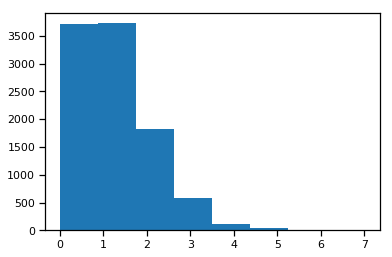

In [4]:
plt.hist(samples, bins=len(set(samples)));

### Continuous Random Variables

$$X \in [0,1]$$

$$Y \in (-\infty, \infty)$$

**Probability Density Function**: 

For continuous $X$,

$$Pr(x \le X \le x + dx) = f(x|\theta)dx \, \text{ as } \, dx \rightarrow 0$$

![Continuous variable](https://upload.wikimedia.org/wikipedia/commons/7/74/Normal_Distribution_PDF.svg)

***e.g. normal distribution***

<div style="font-size: 150%;">  
$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right]$$
</div>

* $X \in \mathbf{R}$
* $\mu \in \mathbf{R}$
* $\sigma>0$

$$\begin{align}E(X) &= \mu \cr
\text{Var}(X) &= \sigma^2 \end{align}$$

In [5]:
from pymc3 import Normal

y = Normal.dist(mu=-2, sd=4)
samples = y.random(size=10000)

In [6]:
samples.mean()

-2.0663234169357367

In [7]:
samples.std()

4.009771965541898

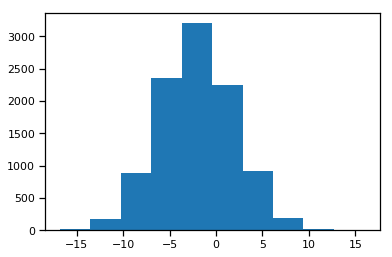

In [8]:
plt.hist(samples);

### Step 2: Calculate a posterior distribution

The mathematical form \\(p(\theta | y)\\) that we associated with the Bayesian approach is referred to as a **posterior distribution**.

> posterior /pos·ter·i·or/ (pos-tēr´e-er) later in time; subsequent.

Why posterior? Because it tells us what we know about the unknown \\(\theta\\) *after* having observed \\(y\\).

This posterior distribution is formulated as a function of the probability model that was specified in Step 1. Usually, we can write it down but we cannot calculate it analytically. In fact, the difficulty inherent in calculating the posterior distribution for most models of interest is perhaps the major contributing factor for the lack of widespread adoption of Bayesian methods for data analysis. Various strategies for doing so comprise this tutorial.

**But**, once the posterior distribution is calculated, you get a lot for free:

- point estimates
- credible intervals
- quantiles
- predictions

### Step 3: Check your model

Though frequently ignored in practice, it is critical that the model and its outputs be assessed before using the outputs for inference. Models are specified based on assumptions that are largely unverifiable, so the least we can do is examine the output in detail, relative to the specified model and the data that were used to fit the model.

Specifically, we must ask:

- does the model fit data?
- are the conclusions reasonable?
- are the outputs sensitive to changes in model structure?



## Estimation for one group

Before we compare two groups using Bayesian analysis, let's start with an even simpler scenario: statistical inference for one group.

For this we will use Gelman et al.'s (2007) radon dataset. In this dataset the amount of the radioactive gas radon has been measured among different households in all counties of several states. Radon gas is known to be the highest cause of lung cancer in non-smokers. It is believed to be more strongly present in households containing a basement and to differ in amount present among types of soil.

>  the US EPA has set an action level of 4 pCi/L. At or above this level of radon, the EPA recommends you take corrective measures to reduce your exposure to radon gas.

![radon](http://www.fix-your-radon.com/images/how_radon_enters.jpg)

Let's import the dataset:

In [9]:
radon = pd.read_csv('radon.csv', index_col=0)
radon.head()

,idnum,state,state2,stfips,zip,region,typebldg,floor,room,basement,...,pcterr,adjwt,dupflag,zipflag,cntyfips,county,fips,Uppm,county_code,log_radon
0,5081.0,MN,MN,27.0,55735,5.0,1.0,1.0,3.0,N,...,9.7,1146.499190,1.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.832909
1,5082.0,MN,MN,27.0,55748,5.0,1.0,0.0,4.0,Y,...,14.5,471.366223,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.832909
2,5083.0,MN,MN,27.0,55748,5.0,1.0,0.0,4.0,Y,...,9.6,433.316718,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,1.098612
3,5084.0,MN,MN,27.0,56469,5.0,1.0,0.0,4.0,Y,...,24.3,461.623670,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.095310
4,5085.0,MN,MN,27.0,55011,3.0,1.0,0.0,4.0,Y,...,13.8,433.316718,0.0,0.0,3.0,ANOKA,27003.0,0.428565,1,1.163151


Let's focus on the (log) radon levels measured in a single county (Hennepin). 

Suppose we are interested in:

- whether the mean log-radon value is greater than 4 pCi/L in Hennepin county
- the probability that any randomly-chosen household in Hennepin county has a reading of greater than 4

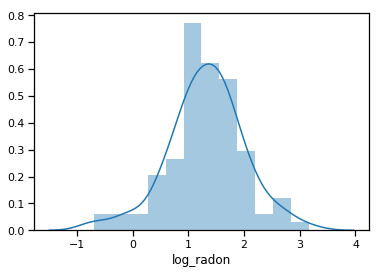

In [10]:
hennepin_radon = radon.query('county=="HENNEPIN"').log_radon
sns.distplot(hennepin_radon)

In [11]:
hennepin_radon.shape

(105,)

### The model

Recall that the first step in Bayesian inference is specifying a **full probability model** for the problem.

This consists of:

- a likelihood function(s) for the observations
- priors for all unknown quantities

The measurements look approximately normal, so let's start by assuming a normal distribution as the sampling distribution (likelihood) for the data. 

$$y_i \sim N(\mu, \sigma^2)$$

(don't worry, we can evaluate this assumption)

This implies that we have 2 unknowns in the model; the mean and standard deviation of the distribution. 

#### Prior choice

How do we choose distributions to use as priors for these parameters? 

There are several considerations:

- discrete vs continuous values
- the support of the variable
- the available prior information

While there may likely be prior information about the distribution of radon values, we will assume no prior knowledge, and specify a **diffuse** prior for each parameter.

Since the mean can take any real value (since it is on the log scale), we will use another normal distribution here, and specify a large variance to allow the possibility of very large or very small values:

$$\mu \sim N(0, 10^2)$$

For the standard deviation, we know that the true value must be positive (no negative variances!). I will choose a uniform prior bounded from below at zero and from above at a value that is sure to be higher than any plausible value the true standard deviation (on the log scale) could take.

$$\sigma \sim U(0, 10)$$

We can encode these in a Python model, using the PyMC3 package, as follows:

In [12]:
from pymc3 import Model, Uniform

with Model() as radon_model:
    
    μ = Normal('μ', mu=0, sd=10)
    σ = Uniform('σ', 0, 10)

> ## Software
> Today there is an array of software choices for Bayesians, including both open source software (*e.g.*, Stan, PyMC, JAGS, emcee) and commercial (*e.g.*, SAS, Stata). These examples can be replicated in any of these environments.

All that remains is to add the likelihood, which takes $\mu$ and $\sigma$ as parameters, and the log-radon values as the set of observations:

In [13]:
with radon_model:
    
    y = Normal('y', mu=μ, sd=σ, observed=hennepin_radon)

Now, we will fit the model using a numerical approach called **variational inference**. This will estimate the posterior distribution using an optimized approximation, and then draw samples from it.

In [14]:
from pymc3 import fit

with radon_model:

    samples = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 136.48: 100%|█| 10000/10000 [00:02<00:00, 3740.25it/s]
Finished [100%]: Average Loss = 136.37


c:\users\zn_jo\appdata\local\programs\python\python37\lib\site-packages\pymc3\plots\__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


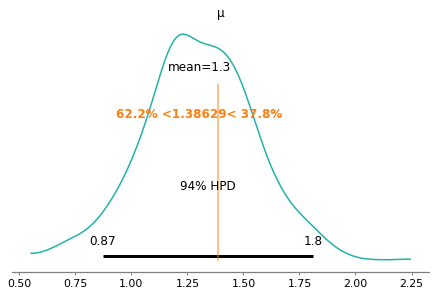

In [15]:
from pymc3 import plot_posterior

plot_posterior(samples, varnames=['μ'], ref_val=np.log(4), color='LightSeaGreen');

The plot shows the posterior distribution of $\mu$, along with an estimate of the 95% posterior **credible interval**. 

The output

    83.1% < 1.38629 < 16.9%%
    
informs us that the probability of $\mu$ being less than $\log(4)$ is 83.1%% and the corresponding probability of being greater than $\log(4)$ is 16.9%.

> The posterior probability that the mean level of household radon in Henneprin County is greater than 4 pCi/L is 0.17.

### Prediction

What is the probability that a given household has a log-radon measurement larger than one? To answer this, we make use of the **posterior predictive distribution**.

$$p(z |y) = \int_{\theta} p(z |\theta) p(\theta | y) d\theta$$

where here $z$ is the predicted value and y is the data used to fit the model.

We can estimate this from the posterior samples of the parameters in the model.

In [16]:
mus = samples['μ']
sigmas = samples['σ']

In [17]:
radon_samples = Normal.dist(mus, sigmas).random()

In [18]:
(radon_samples > np.log(4)).mean()

0.431

> The posterior probability that a randomly-selected household in Henneprin County contains radon levels in excess of 4 pCi/L is 0.48.

### Model checking

But, ***how do we know this model is any good?***

Its important to check the fit of the model, to see if its assumptions are reasonable. One way to do this is to perform **posterior predictive checks**. This involves generating simulated data using the model that you built, and comparing that data to the observed data.

One can choose a particular statistic to compare, such as tail probabilities or quartiles, but here it is useful to compare them graphically.

We already have these simulations from the previous exercise!

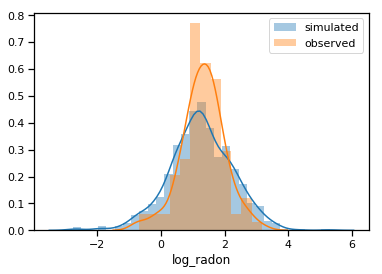

In [19]:
sns.distplot(radon_samples, label='simulated')
sns.distplot(hennepin_radon, label='observed')
plt.legend()

### Prior sensitivity

Its also important to check the sensitivity of your choice of priors to the resulting inference.

Here is the same model, but with drastically different (though still uninformative) priors specified:

In [20]:
from pymc3 import Flat, HalfCauchy

with Model() as prior_sensitivity:
    
    μ = Flat('μ')
    σ = HalfCauchy('σ', 5)
    
    dist = Normal('dist', mu=μ, sd=σ, observed=hennepin_radon)
    
    sensitivity_samples = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 123.88: 100%|█| 10000/10000 [00:02<00:00, 3871.97it/s]
Finished [100%]: Average Loss = 123.86


c:\users\zn_jo\appdata\local\programs\python\python37\lib\site-packages\pymc3\plots\__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


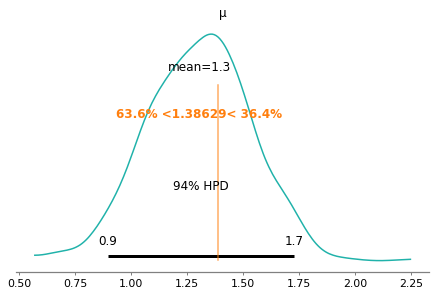

In [21]:
plot_posterior(sensitivity_samples, varnames=['μ'], ref_val=np.log(4), color='LightSeaGreen');

Here is the original model for comparison:

c:\users\zn_jo\appdata\local\programs\python\python37\lib\site-packages\pymc3\plots\__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


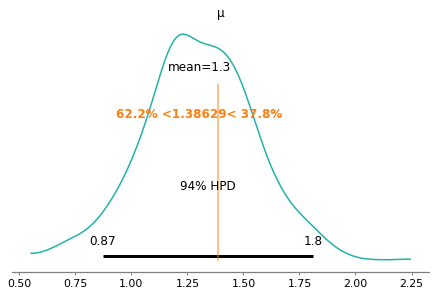

In [22]:
plot_posterior(samples, varnames=['μ'], ref_val=np.log(4), color='LightSeaGreen');

## Two Groups with Continiuous Outcome

To illustrate how this Bayesian estimation approach works in practice, we will use a fictitious example from Kruschke (2012) concerning the evaluation of a clinical trial for drug evaluation. The trial aims to evaluate the efficacy of a "smart drug" that is supposed to increase intelligence by comparing IQ scores of individuals in a treatment arm (those receiving the drug) to those in a control arm (those recieving a placebo). There are 47 individuals and 42 individuals in the treatment and control arms, respectively.

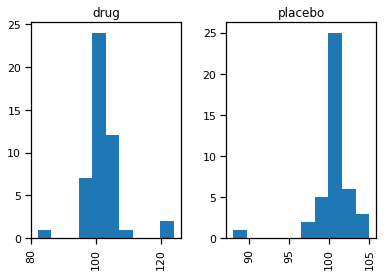

In [23]:
drug = pd.DataFrame(dict(iq=(101,100,102,104,102,97,105,105,98,101,100,123,105,103,100,95,102,106,
        109,102,82,102,100,102,102,101,102,102,103,103,97,97,103,101,97,104,
        96,103,124,101,101,100,101,101,104,100,101),
                         group='drug'))
placebo = pd.DataFrame(dict(iq=(99,101,100,101,102,100,97,101,104,101,102,102,100,105,88,101,100,
           104,100,100,100,101,102,103,97,101,101,100,101,99,101,100,100,
           101,100,99,101,100,102,99,100,99),
                            group='placebo'))

trial_data = pd.concat([drug, placebo], ignore_index=True)
trial_data.hist('iq', by='group');

Since there appear to be extreme ("outlier") values in the data, we will choose a Student-t distribution to describe the distributions of the scores in each group. This sampling distribution adds **robustness** to the analysis, as a T distribution is less sensitive to outlier observations, relative to a normal distribution. 

The three-parameter Student-t distribution allows for the specification of a mean $\mu$, a precision (inverse-variance) $\lambda$ and a degrees-of-freedom parameter $\nu$:

$$f(x|\mu,\lambda,\nu) = \frac{\Gamma(\frac{\nu + 1}{2})}{\Gamma(\frac{\nu}{2})} \left(\frac{\lambda}{\pi\nu}\right)^{\frac{1}{2}} \left[1+\frac{\lambda(x-\mu)^2}{\nu}\right]^{-\frac{\nu+1}{2}}$$
           
the degrees-of-freedom parameter essentially specifies the "normality" of the data, since larger values of $\nu$ make the distribution converge to a normal distribution, while small values (close to zero) result in heavier tails.

Thus, the likelihood functions of our model are specified as follows:

$$\begin{align}
y^{(drug)}_i &\sim T(\nu, \mu_1, \sigma_1) \\
y^{(placebo)}_i &\sim T(\nu, \mu_2, \sigma_2)
\end{align}$$

As a simplifying assumption, we will assume that the degree of normality $\nu$ is the same for both groups. 

### Exercise

Draw 10000 samples from a Student-T distribution (`StudentT` in PyMC3) with parameter `nu=3` and compare the distribution of these values to a similar number of draws from a Normal distribution with parameters `mu=0` and `sd=1`.

In [24]:
from pymc3 import StudentT

t = StudentT.dist(nu=3).random(size=10000)
n = Normal.dist(0, 1).random(size=10000)

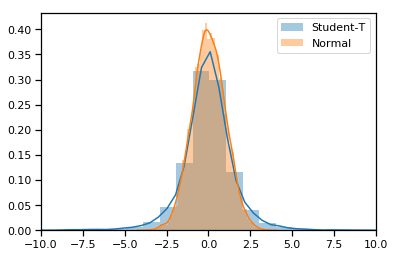

In [25]:
sns.distplot(t, label='Student-T')
sns.distplot(n, label='Normal')
plt.legend()
plt.xlim(-10,10);


### Prior choice

Since the means are real-valued, we will apply normal priors. Since we know something about the population distribution of IQ values, we will center the priors at 100, and use a standard deviation that is more than wide enough to account for plausible deviations from this population mean:

$$\mu_k \sim N(100, 10^2)$$

In [26]:
with Model() as drug_model:
    
    μ_0 = Normal('μ_0', 100, sd=10)
    μ_1 = Normal('μ_1', 100, sd=10)

Similarly, we will use a uniform prior for the standard deviations, with an upper bound of 20.

In [27]:
with drug_model:
    σ_0 = Uniform('σ_0', lower=0, upper=20)
    σ_1 = Uniform('σ_1', lower=0, upper=20)

For the degrees-of-freedom parameter $\nu$, we will use an **exponential** distribution with a mean of 30; this allocates high prior probability over the regions of the parameter that describe the range from normal to heavy-tailed data under the Student-T distribution.

In [28]:
from pymc3 import Exponential

with drug_model:
    ν = Exponential('ν_minus_one', 1/29.) + 1


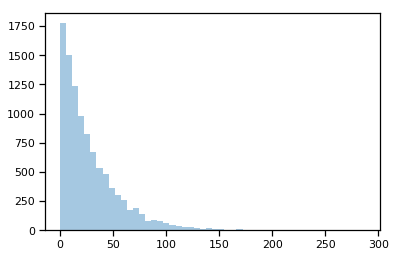

In [29]:
sns.distplot(Exponential.dist(1/29).random(size=10000), kde=False);

In [30]:
from pymc3 import StudentT

with drug_model:

    drug_like = StudentT('drug_like', nu=ν, mu=μ_1, lam=σ_1**-2, observed=drug.iq)
    placebo_like = StudentT('placebo_like', nu=ν, mu=μ_0, lam=σ_0**-2, observed=placebo.iq)

Now that the model is fully specified, we can turn our attention to tracking the posterior quantities of interest. Namely, we can calculate the difference in means between the drug and placebo groups.

As a joint measure of the groups, we will also estimate the "effect size", which is the difference in means scaled by the pooled estimates of standard deviation. This quantity can be harder to interpret, since it is no longer in the same units as our data, but it is a function of all four estimated parameters.

In [31]:
from pymc3 import Deterministic

with drug_model:
    
    diff_of_means = Deterministic('difference of means', μ_1 - μ_0)
    
    effect_size = Deterministic('effect size', 
                        diff_of_means / np.sqrt((σ_1**2 + σ_0**2) / 2))



In [32]:
with drug_model:
    
    drug_trace = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 244.65: 100%|█| 10000/10000 [00:03<00:00, 3026.09it/s]
Finished [100%]: Average Loss = 244.55


c:\users\zn_jo\appdata\local\programs\python\python37\lib\site-packages\pymc3\plots\__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


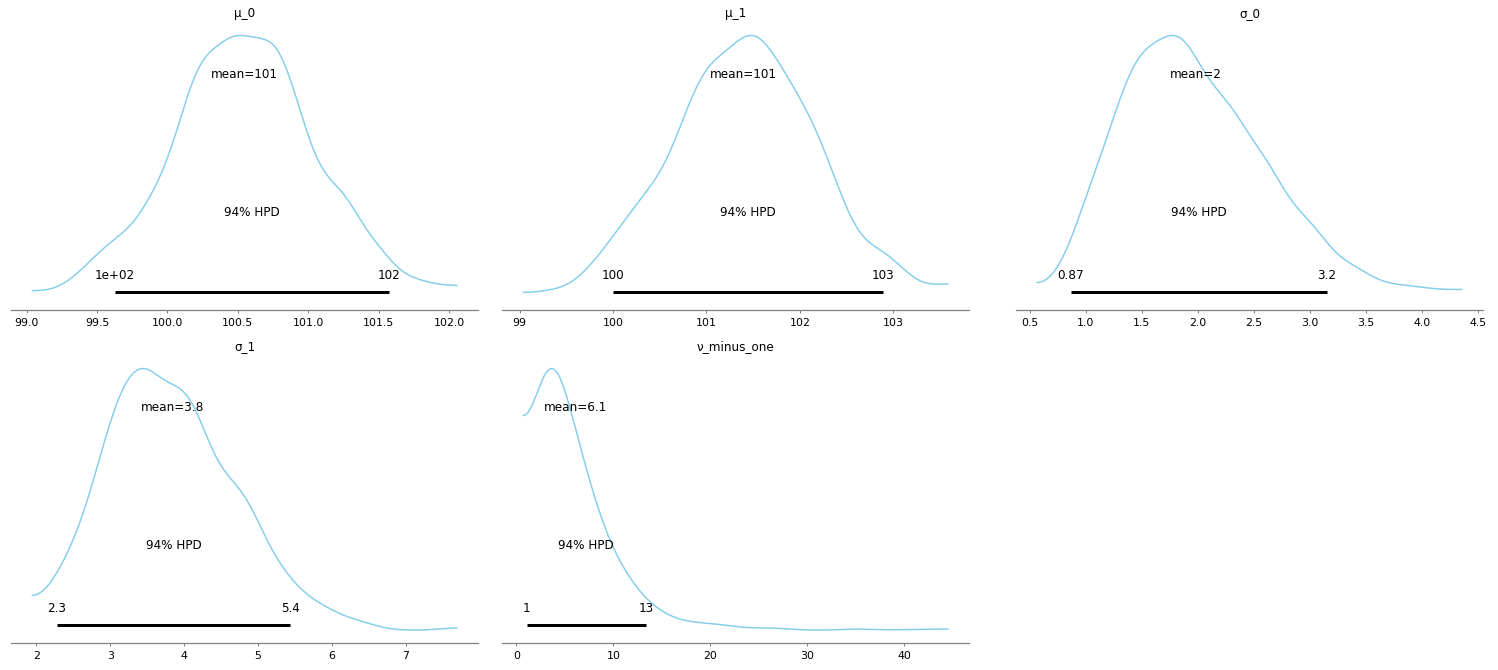

In [33]:
plot_posterior(drug_trace[100:], 
                varnames=['μ_0', 'μ_1', 'σ_0', 'σ_1', 'ν_minus_one'],
                color='#87ceeb');

c:\users\zn_jo\appdata\local\programs\python\python37\lib\site-packages\pymc3\plots\__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


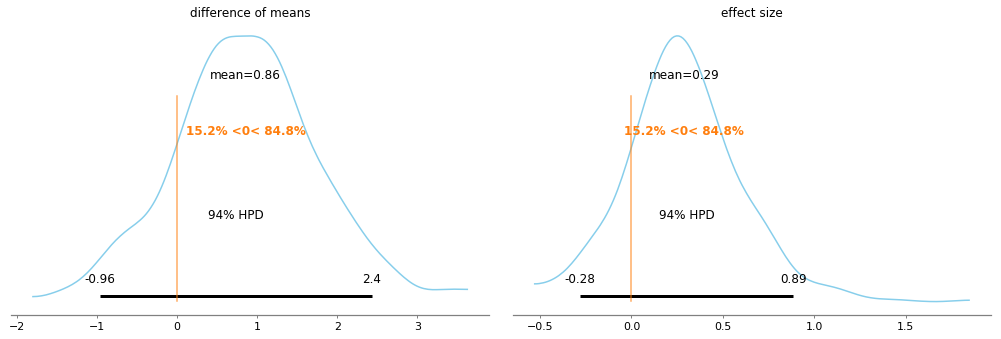

In [34]:
plot_posterior(drug_trace[100:], 
          varnames=['difference of means', 'effect size'],
          ref_val=0,
          color='#87ceeb');

> The posterior probability that the mean IQ of subjects in the treatment group is greater than that of the control group is 0.99.

### Exercise

Load the `nashville_precip.txt` dataset. Build a model to compare rainfall in January and July. 

- What's the probability that the expected rainfall in January is larger than in July?
- What's the probability that January rainfall exceeds July rainfall in a given year?

In [35]:
nash_precip = pd.read_table('../data/nashville_precip.txt', 
                            delimiter='\s+', na_values='NA', index_col=0)
nash_precip.head()

FileNotFoundError: [Errno 2] File b'../data/nashville_precip.txt' does not exist: b'../data/nashville_precip.txt'

In [ ]:
# %load ../exercises/rainfall.py

## Two Groups with Binary Outcome

Now that we have seen how to generalize normally-distributed data to another distribution, we are equipped to analyze other data types. Binary outcomes are common in clinical research: 

- survival/death
- true/false
- presence/absence
- positive/negative

> *Never, ever dichotomize continuous or ordinal variables prior to statistical analysis*

In practice, binary outcomes are encoded as ones (for event occurrences) and zeros (for non-occurrence). A single binary variable is distributed as a **Bernoulli** random variable:

$$f(x \mid p) = p^{x} (1-p)^{1-x}$$

Such events are sometimes reported as sums of individual events, such as the number of individuals in a group who test positive for a condition of interest. Sums of Bernoulli events are distributed as **binomial** random variables.

$$f(x \mid n, p) = \binom{n}{x} p^x (1-p)^{n-x}$$

The parameter in both models is $p$, the probability of the occurrence of an event. In terms of inference, we are typically interested in whether $p$ is larger or smaller in one group relative to another.

To demonstrate the comparison of two groups with binary outcomes using Bayesian inference, we will use a sample pediatric dataset. Data on 671 infants with very low (<1600 grams) birth weight from 1981-87 were collected at Duke University Medical Center. Of interest is the relationship between the outcome intra-ventricular hemorrhage (IVH) and predictor such as birth weight, gestational age, presence of pneumothorax and mode of delivery.

![](images/ivh.gif)

In [ ]:
vlbw = pd.read_csv('../data/vlbw.csv', index_col=0).dropna(axis=0, subset=['ivh', 'pneumo'])
vlbw.head()

To demonstrate binary data analysis, we will try to estimate the difference between the probability of an intra-ventricular hemorrhage for infants with a pneumothorax. 

In [ ]:
pd.crosstab(vlbw.ivh, vlbw.pneumo)

We will create a binary outcome by combining `definite` and `possible` into a single outcome.

In [ ]:
ivh = vlbw.ivh.isin(['definite', 'possible']).astype(int).values
x = vlbw.pneumo.astype(int).values

### Prior choice

What should we choose as a prior distribution for $p$?

We could stick with a normal distribution, but note that the value of $p$ is **constrained** by the laws of probability. Namely, we cannot have values smaller than zero nor larger than one. So, choosing a normal distribution will result in ascribing positive probability to unsupported values of the parameter. In many cases, this will still work in practice, but will be inefficient for calculating the posterior and will not accurately represent the prior information about the parameter.

A common choice in this context is the **beta distribution**, a continuous distribution with 2 parameters and whose support is on the unit interval:

$$ f(x \mid \alpha, \beta) = \frac{x^{\alpha - 1} (1 - x)^{\beta - 1}}{B(\alpha, \beta)}$$

- Support: $x \in (0, 1)$
- Mean: $\dfrac{\alpha}{\alpha + \beta}$
- Variance: $\dfrac{\alpha \beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$

In [ ]:
from pymc3 import Beta

params = (5, 1), (1, 3), (5, 5), (0.5, 0.5), (1, 1)

fig, axes = plt.subplots(1, len(params), figsize=(14, 4), sharey=True)
for ax, (alpha, beta) in zip(axes, params):
    sns.distplot(Beta.dist(alpha, beta).random(size=10000), ax=ax, kde=False)
    ax.set_xlim(0, 1)
    ax.set_title(r'$\alpha={0}, \beta={1}$'.format(alpha, beta));

So let's use a beta distribution to model our prior knowledge of the probabilities for both groups. Setting $\alpha = \beta = 1$ will result in a uniform distribution of prior mass:

In [ ]:
with Model() as ivh_model:
    
    p = Beta('p', 1, 1, shape=2)

We can now use `p` as the parameter of our Bernoulli likelihood. Here, `x` is a vector of zeros an ones, which will extract the approproate group probability for each subject:

In [ ]:
from pymc3 import Bernoulli

with ivh_model:
    
    bb_like = Bernoulli('bb_like', p=p[x], observed=ivh)

Finally, since we are interested in the difference between the probabilities, we will keep track of this difference:

In [ ]:
with ivh_model:
    
    p_diff = Deterministic('p_diff', p[1] - p[0])

In [ ]:
with ivh_model:
    ivh_trace = fit(random_seed=RANDOM_SEED).sample(1000)

In [ ]:
plot_posterior(ivh_trace[100:], varnames=['p'], color='#87ceeb');

We can see that the probability that `p` is larger for the pneumothorax with probability one.

In [ ]:
plot_posterior(ivh_trace[100:], varnames=['p_diff'], ref_val=0, color='#87ceeb');

## References and Resources

- Goodman, S. N. (1999). Toward evidence-based medical statistics. 1: The P value fallacy. Annals of Internal Medicine, 130(12), 995–1004. http://doi.org/10.7326/0003-4819-130-12-199906150-00008
- Johnson, D. (1999). The insignificance of statistical significance testing. Journal of Wildlife Management, 63(3), 763–772.
- Gelman, A., Carlin, J. B., Stern, H. S., Dunson, D. B., Vehtari, A., & Rubin, D. B. (2013). Bayesian Data Analysis, Third Edition. CRC Press.
- Kruschke, J.K. *Doing Bayesian Data Analysis, Second Edition: A Tutorial with R, JAGS, and Stan.* 2015. Academic Press / Elsevier. 
- O'Shea M, Savitz D.A., Hage M.L., Feinstein K.A.: *Prenatal events and the risk of subependymal / intraventricular haemorrhage in very low birth weight neonates*. **Paediatric and Perinatal Epdiemiology** 1992;6:352-362